Dataset: Dry Bean

Sumber: https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

Dataset Dry Bean merupakan dataset tentang 7 jenis biji kering. Tujuh biji kering tersebut ditentukan dengan mempertimbangkan ciri-cirinya, seperti wujud, bentuk, jenis dan strukturnya. Dataset ini memiliki 13611 baris data dengan 16 fitur dan 1 kelas. Kelas dalam dataset ini bernama Class yang terdiri dari SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA, dan DERMASON. Dataset Dry Bean merupakan dataset hasil pengukuran terhadap biji kering. Sehingga dataset ini bisa dikategorikan sebagai data kontinu. 

# **1. Import Modul dan Get Data**

Mempersiapkan bahan-bahan yang akan digunakan dalam proses Machine Learning, dapat berupa modul dan dataset yang akan diolah

Import library yang dapat membantu dalam proses Machine Learning

In [1]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Menghapus semua lokal file (untuk kebutuhan run ulang program)

In [2]:
! rm *

rm: cannot remove 'sample_data': Is a directory


Unduh dataset yang akan digunakan

In [3]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

--2021-04-14 15:26:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738776 (4.5M) [application/x-httpd-php]
Saving to: ‘DryBeanDataset.zip’

DryBeanDataset.zip  100%[===================>]   4.52M  8.68MB/s    in 0.5s    

2021-04-14 15:26:21 (8.68 MB/s) - ‘DryBeanDataset.zip’ saved [4738776/4738776]



Melakukan unzip atau ekstrak arsip dataset yang sudah diunduh

In [4]:
! unzip 'DryBeanDataset.zip'

Archive:  DryBeanDataset.zip
   creating: DryBeanDataset/
  inflating: DryBeanDataset/Dry_Bean_Dataset.arff  
  inflating: DryBeanDataset/Dry_Bean_Dataset.txt  
  inflating: DryBeanDataset/Dry_Bean_Dataset.xlsx  


Cek direktori apakah dataset sudah berhasil diunduh dan diekstrak

In [5]:
! ls 'DryBeanDataset'

Dry_Bean_Dataset.arff  Dry_Bean_Dataset.txt  Dry_Bean_Dataset.xlsx


Memasukkan dataset ke dalam variabel **df**

In [6]:
# ambil data dan memasukkannya ke dalam variabel
# data yang akan digunakan terleatak pada file Dry_Bean_Dataset.xlsx pada sheet Dry_Beans_Dataset
df = pd.read_excel('/content/DryBeanDataset/Dry_Bean_Dataset.xlsx', 'Dry_Beans_Dataset')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


# **2. EDA & Preprocessing**

Mendapatkan informasi tentang dataset yang dimiliki dan melakukan preprocessing atau mengolah data mentah agar siap digunakan dalam proses Machine Learning

## 2.1 Get Dataframe Info

Mendapatkan informasi tentang dataset yang dimiliki

Menggunakan fungsi describe() dari modul pandas untuk mendapatkan rangkuman informasi deskriptif dari fitur data yang dapat dihitung secara statistik

In [7]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Mendapatkan informasi umum dari dataset yang dimiliki

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Dari total 13611 baris data dalam Dataframe, diketahui bahwa tidak ada nilai kosong/null di satu baris pun dan tidak ada data yang bernilai 0 (nol)

Mendapatkan informasi jumlah baris data setiap kelas

In [9]:
df.groupby('Class').size()

Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64

Mendapatkan informasi ada atau tidaknya data duplikat dalam dataset

In [10]:
df.duplicated().value_counts()

False    13543
True        68
dtype: int64

In [11]:
df[df.duplicated()].groupby('Class').size()

Class
HOROZ    68
dtype: int64

Dari total 13611 baris data dalam Dataframe, diketahui bahwa terdapat 68 data yang bernilai sama atau duplikat pada kelas HOROZ. Untuk mempertahankan jumlah data sebanyak 13611, maka data duplikat ini akan dibiarkan

Mendapatkan informasi apakah ada nilai kosong pada baris data

In [12]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Dari 13611 baris data, tidak ada data kosong pada setiap baris data

## 2.2 Handle Outlier

Data pencilan atau data outlier adalah data yang berbeda secara signifikan dengan kumpulan data lainnya. Data outlier dapat disebabkan salah satunya oleh variabilitas dalam pengukuran atau kesalahan pengukuran. Handle ourlier ditujukan untuk mengubah nilai data yang berbeda secara signifikan menjadi nilai yang seragam dengan nilai data lainnya, dapat berupa median dan rata-rata

Melakukan pengecekan ada atau tidaknya data pencilan dengan menggunakan fungsi boxplot dari modul pandas yang akan menghasilkan output berupa ilustrasi data yang dimiliki

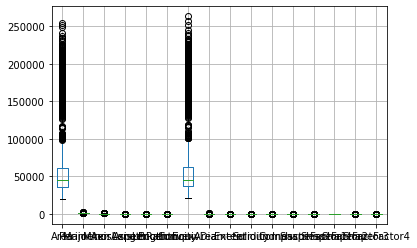

In [13]:
df.boxplot()

Dikarenakan data memiliki perbedaan rentang fitur yang cukup besar, maka data pencilan tidak dapat dilhat dengan jelas sehingga digunakan plotting setiap fitur

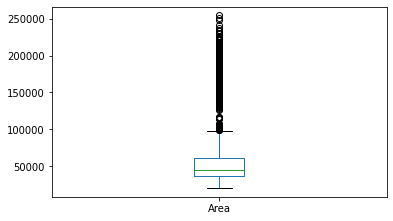

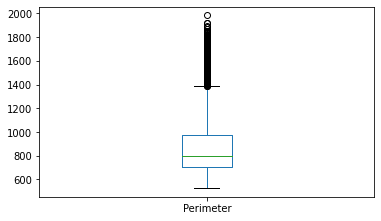

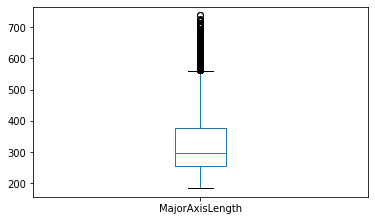

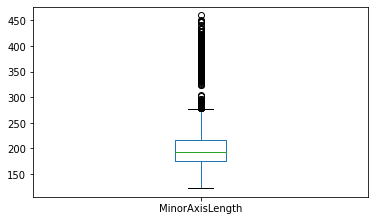

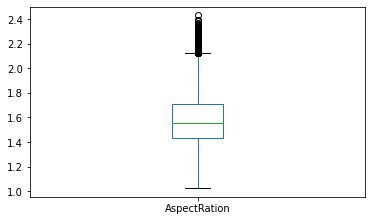

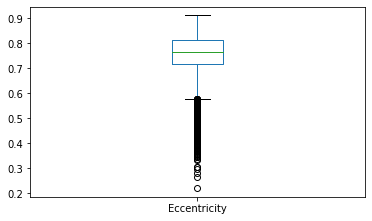

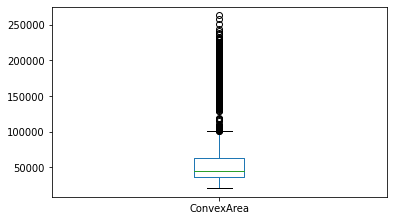

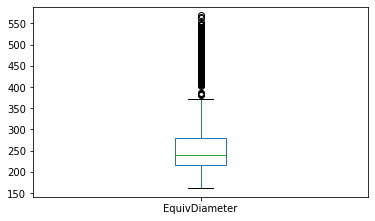

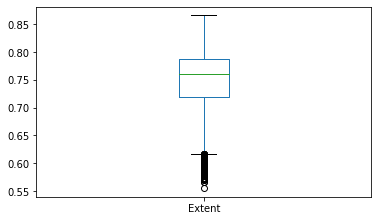

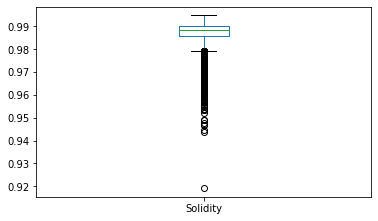

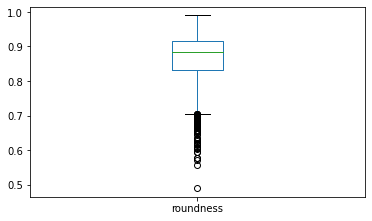

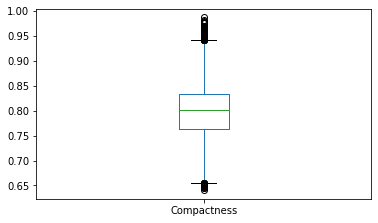

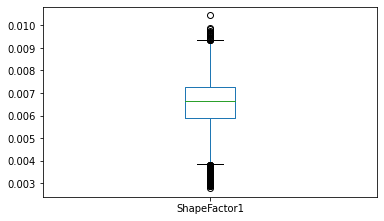

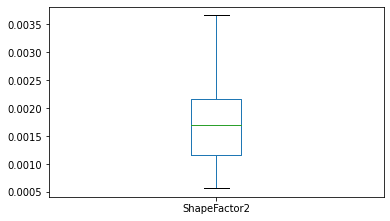

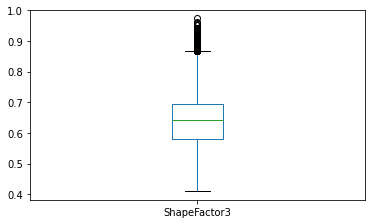

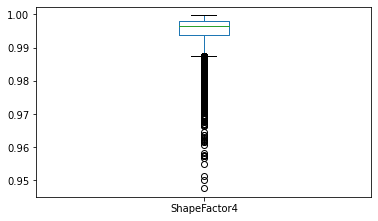

In [14]:
daftar_fitur = df.columns[:-1]
for fitur in daftar_fitur:
  plt.figure(figsize=(6,3.5))
  df[fitur].plot.box()
  plt.show()

Dari gambaran boxplot yang dihasilkan, dapat diketahui bahwa terdapat data outlier yang cukup banyak hampir di semua fitur. Outlier ini ditandai dengan adanya titik yang berada di luar whiskers atau garis terluar dari boxplot, baik di atas maupun di bawah

Untuk mempertahankan jumlah dataset sebanyak 13611 baris, maka Handle Outlier dilakukan dengan substitusi nilai pada data outlier. Data outlier tersebut akan disubstitusikan dengan nilai maximum atau minimum dari fitur yang bersangkutan.


In [15]:
#mengambil semua kolom fitur tanpa kolom terakhir atau Class
daftar_fitur = df.columns[:-1]

#Mengganti outlier dengan subtitusi nilai baru
for fitur in daftar_fitur:
  #menentukan batas maximum dan minimum outlier
  q1, q3 = np.percentile(df[fitur], [25,75])
  iqr = q3-q1
  minimum = q1 - (1.5 * iqr)
  maximum = q3 + (1.5 * iqr)

  # substitusi nilai outlier
  df[fitur] = np.where(df[fitur]>maximum, maximum, df[fitur]) # jika melebihi maximum, set nilai jadi maximum
  df[fitur] = np.where(df[fitur]<minimum, minimum, df[fitur]) # jika kurang dari minimum, set nilai jadi minimum

# iqr = interquartile  range

Cek Data pencilan setelah melakukan Handle Outlier

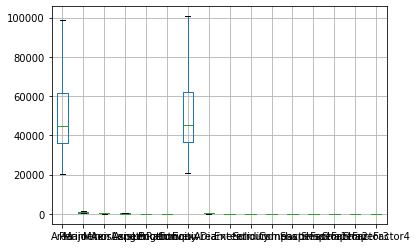

In [16]:
df.boxplot()

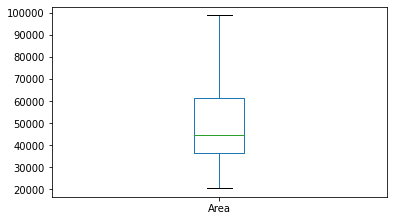

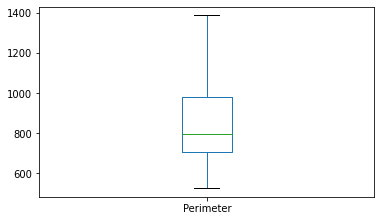

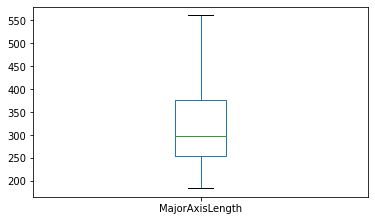

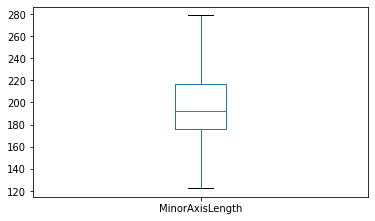

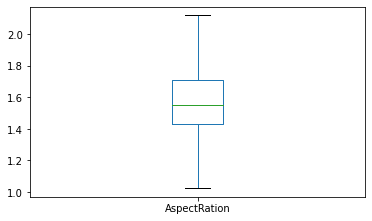

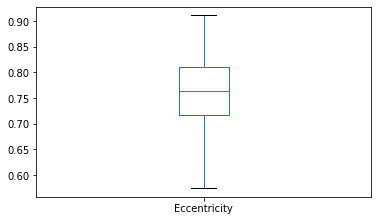

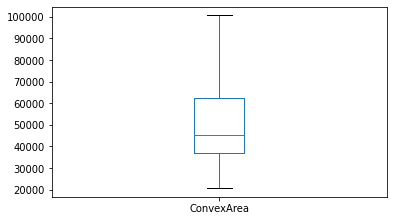

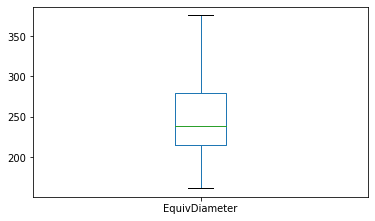

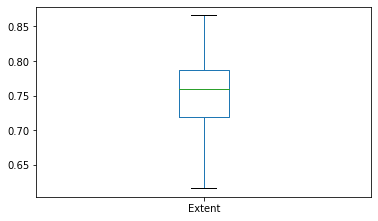

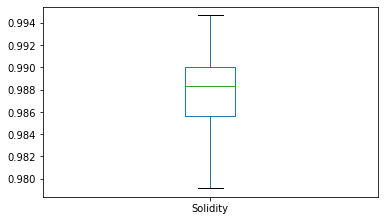

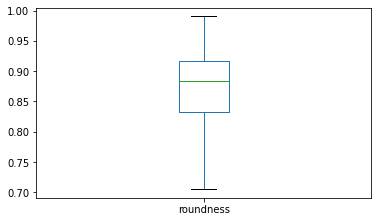

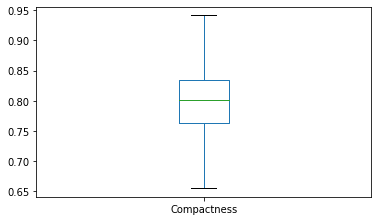

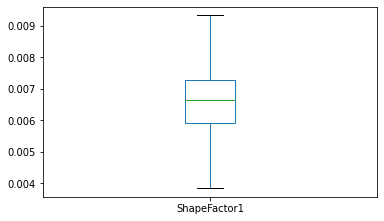

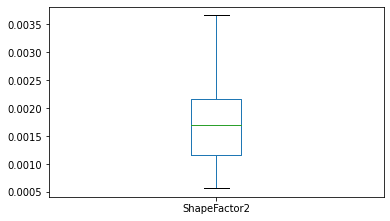

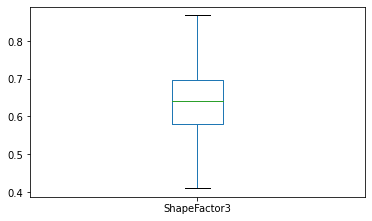

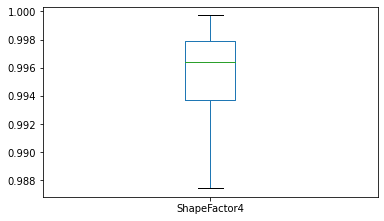

In [17]:
daftar_fitur = df.columns[:-1]
for fitur in daftar_fitur:
  plt.figure(figsize=(6,3.5))
  df[fitur].plot.box()
  plt.show()

Didapatkan bahwa data outlier atau data pencilan berhasil diatasi dengan mensubtitusikan nilai maximum atau minimum fitur yang bersangkutan

## 2.3 Normalisasi Z-Score

Normalisasi adalah suatu proses yang bertujuan untuk menormalkan data atau menghasilkan distribusi data yang lebih mudah dibaca dan lebih baik. Normalisasi dapat dilakukan dengan menormalkan rentang fitur atau menormalkan ragam data (simpangan baku / standar deviasi). Metode normalisasi yang digunakan untuk dataset kali ini adalah Z-Score dengan menggunakan bantuan modul sklearn (scikit-learn). Normalisasi Z-Score digunakan ntuk menormalkan atau menyamakan ragam data yang dimiliki sehingga bernilai 1.

Cek standar deviasi sebelum dilakukan normalisasi

In [18]:
df.std()

Area               18805.909740
Perimeter            188.983630
MajorAxisLength       80.332564
MinorAxisLength       32.736714
AspectRation           0.240826
Eccentricity           0.083215
ConvexArea         19191.287348
EquivDiameter         47.363930
Extent                 0.048103
Solidity               0.003575
roundness              0.058508
Compactness            0.061504
ShapeFactor1           0.001085
ShapeFactor2           0.000596
ShapeFactor3           0.098143
ShapeFactor4           0.003295
dtype: float64

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# daftar fitur yang akan dilakukan normalisasi
daftar_fitur = df.columns[:-1]
df[daftar_fitur] = scaler.fit_transform(df[daftar_fitur])

# cek standar deviasi
df.std()

Area               1.000037
Perimeter          1.000037
MajorAxisLength    1.000037
MinorAxisLength    1.000037
AspectRation       1.000037
Eccentricity       1.000037
ConvexArea         1.000037
EquivDiameter      1.000037
Extent             1.000037
Solidity           1.000037
roundness          1.000037
Compactness        1.000037
ShapeFactor1       1.000037
ShapeFactor2       1.000037
ShapeFactor3       1.000037
ShapeFactor4       1.000037
dtype: float64

Cek dataframe hasil normalisasi

In [20]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.158101,-1.256001,-1.374254,-0.754155,-1.593134,-2.164759,-1.154709,-1.253256,0.288191,0.391994,1.443596,1.846568,0.693778,2.402173,1.945927,1.021155,SEKER
1,-1.140074,-1.109279,-1.469528,-0.483939,-2.007702,-2.164759,-1.130895,-1.229363,0.704930,-0.690705,0.230145,2.311820,0.368651,3.100893,2.289880,0.932056,SEKER
2,-1.105722,-1.182876,-1.316393,-0.691764,-1.541139,-2.164759,-1.103903,-1.184218,0.583210,0.588587,1.269635,1.772042,0.613065,2.235091,1.860826,1.125032,SEKER
3,-1.072327,-1.067655,-1.344628,-0.490595,-1.773991,-2.164759,-1.050022,-1.140804,0.678177,-2.321377,0.519054,2.089993,0.403730,2.515075,2.226874,-0.352257,SEKER
4,-1.065308,-1.203915,-1.453058,-0.253460,-2.159512,-2.164759,-1.066020,-1.131737,0.478946,0.961891,1.902527,2.311820,0.109128,3.270983,2.289880,1.155359,SEKER


Cek informasi statistik dataframe untuk melihat minimum dan maximum baris data

In [21]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04
mean,1.382456e-16,7.875560e-16,-2.335457e-16,2.109562e-15,1.615792e-15,1.471741e-15,2.079660e-16,-8.046038e-16,-5.735133e-16,-2.989457e-14,1.562873e-15,-1.719006e-16,3.892853e-15,7.887938e-16,-3.080785e-16,9.653524e-15
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.582185e+00,-1.708729e+00,-1.680206e+00,-2.323585e+00,-2.308714e+00,-2.164759e+00,-1.573196e+00,-1.863391e+00,-2.780675e+00,-2.321377e+00,-2.882317e+00,-2.358025e+00,-2.520980e+00,-1.932991e+00,-2.373260e+00,-2.405657e+00
25%,-7.362501e-01,-7.626467e-01,-8.125000e-01,-6.942991e-01,-6.168104e-01,-4.605915e-01,-7.378642e-01,-7.269523e-01,-6.533456e-01,-4.991414e-01,-7.088661e-01,-6.068330e-01,-6.253443e-01,-9.439025e-01,-6.306426e-01,-5.027860e-01
50%,-2.936070e-01,-2.788966e-01,-2.699885e-01,-1.877066e-01,-1.234206e-01,1.224134e-01,-2.968406e-01,-2.335202e-01,2.037117e-01,2.317035e-01,1.638893e-01,2.417019e-02,6.136505e-02,-3.762062e-02,-1.228201e-02,3.115543e-01
75%,5.933808e-01,6.856245e-01,7.210737e-01,5.637711e-01,5.243127e-01,6.755202e-01,5.950553e-01,6.323274e-01,7.648742e-01,7.156823e-01,7.401012e-01,5.606283e-01,6.384126e-01,7.624716e-01,5.375663e-01,7.657946e-01
max,2.587827e+00,2.858031e+00,3.021434e+00,2.450876e+00,2.235997e+00,1.888769e+00,2.594434e+00,2.671247e+00,2.414381e+00,2.020492e+00,2.001805e+00,2.311820e+00,2.534048e+00,3.270983e+00,2.289880e+00,1.327291e+00


Cek visualisasi dalam boxplot

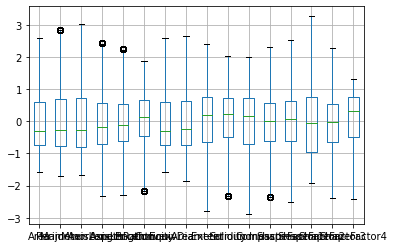

In [22]:
df.boxplot()

# **3. Model Selection / Split Data**

Model selection dilakukan dengan membagi dataframe menjadi data_latih dan data_uji (split data). Data latih adalah kumpulan dataframe yang nantinya akan dibuat model untuk proses training. Sedangkan Data uji adalah data yang nantinya akan diprediksi tergolong ke dalam kelas mana untuk evaluasi Machine Learning. Data uji yang akan digunakan adalah 2 sampel pertama masing-masing kelas yang ada, sehingga akan ada 14 data uji nantinya (7 kelas x 2 sampel).

Membuat function split_data untuk melakukan split dataset menjadi data_latih dan data_uji

In [23]:
# mbmbuat data uji dari dataframe yang ada
def split_data(df):
  # membuat dataframe kosong untuk menyimpan data uji
  daftar_kolom = df.columns[:]
  df_uji = pd.DataFrame(columns=daftar_kolom)

  # daftar nama kelas yang unik
  daftar = np.unique(df[df.columns[-1]])
  daftar_kelas = []
  for i in range(len(daftar)):
    daftar_kelas.append(daftar[i])
    daftar_kelas.append(daftar[i])

  for row in range(df.shape[0]):
    if(len(daftar_kelas) == 0):
      break 
    for kelas in daftar_kelas:
      if(df.iloc[row]['Class'] == kelas):
        daftar_kelas.remove(df.iloc[row]['Class']) #hapus kelas unik yang ditemukan dari list kelas
        df_uji = df_uji.append(df.iloc[row]) #tambahkan kelas ke dataframe kosong / dataframe uji
        df = df.drop(row) # hapus baris data di dataframe asli

  return df,df_uji

Menjalankan fungsi split data dan simpan ke variabel baru data_latih dan data_uji

In [24]:
data_latih,data_uji = split_data(df)

Cek ukuran data_latih dan data_uji

In [25]:
print(data_latih.shape)
print(data_uji.shape)

(13597, 17)
(14, 17)


Cetak isi data_uji

In [26]:
data_uji

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.158101,-1.256001,-1.374254,-0.754155,-1.593134,-2.164759,-1.154709,-1.253256,0.288191,0.391994,1.443596,1.846568,0.693778,2.402173,1.945927,1.021155,SEKER
2,-1.105722,-1.182876,-1.316393,-0.691764,-1.541139,-2.164759,-1.103903,-1.184218,0.583210,0.588587,1.269635,1.772042,0.613065,2.235091,1.860826,1.125032,SEKER
2027,-0.461911,-0.167989,-0.243056,-0.656624,0.448088,0.619754,-0.437274,-0.415220,-1.265760,-2.321377,-1.545383,-0.507962,0.580165,-0.276331,-0.535780,0.647498,BARBUNYA
2029,-0.433994,-0.200427,-0.645728,0.116225,-1.092250,-1.237433,-0.405800,-0.384613,0.434821,-2.321377,-1.169981,1.096021,-0.212283,0.836933,1.108440,-1.311908,BARBUNYA
3349,2.587827,2.284462,1.653062,2.450876,-0.775156,-0.690518,2.594434,2.671247,-0.022319,0.369869,0.029252,0.720365,-2.413625,-0.799123,0.705576,-0.612292,BOMBAY
3351,2.587827,2.536361,1.956950,2.450876,-0.743162,-0.642026,2.594434,2.671247,0.441830,-0.236591,0.499778,0.711372,-2.520980,-0.908466,0.696065,0.656715,BOMBAY
3871,-0.248300,-0.286961,-0.287585,-0.069178,-0.314516,-0.082709,-0.255466,-0.185717,-0.255319,0.661631,0.594609,0.241483,-0.078604,0.080724,0.207782,1.059306,CALI
3873,-0.095736,-0.119051,-0.062256,-0.020702,0.015174,0.257601,-0.096326,-0.027952,1.174174,-0.216567,0.328531,-0.135667,-0.088674,-0.246769,-0.171820,-0.864691,CALI
5501,-0.912903,-0.725751,-0.442565,-1.495400,1.290199,1.136546,-0.912976,-0.939550,-2.382147,0.590740,-0.887658,-1.227028,1.839413,-0.436383,-1.208504,-0.899552,HOROZ
5503,-0.891579,-0.748367,-0.461052,-1.400146,1.089473,1.030867,-0.879887,-0.913337,1.243349,-1.280615,-0.544467,-1.093200,1.703610,-0.367353,-1.086319,-1.888533,HOROZ


Memisahkan label atau kelas dari data uji menjadi variabel tersendiri. Proses ini dilakukan untuk kebutuhan pada proses evaluasi

In [27]:
# backup data_uji dan data_latih sebelum dipop / dipisahkan label kelasnya
data_latih_full = data_latih.copy()
data_uji_full = data_uji.copy()

print(id(data_latih))
print(id(data_latih_full))
print(id(data_uji))
print(id(data_uji_full))

140276755266256
140276493567760
140276756154448
140276492796240


In [28]:
label_uji = data_uji.pop('Class')
label_latih = data_latih.pop('Class')

# **4. Modelling Naive Bayes**

Menjalankan Klasifikasi Naive Bayes dengan model Gaussian


## 4.1 Menghitung Prior

Prior merupakan peluang awal munculnya suatu kelas. Singkatnya, prior adalah hasil pembagian frekuensi dari suatu kelas terhadap keseluruhan data

Membuat fungsi hitung_prior untuk menghitung nilai prior masing-masing kelas unik pada data latih

In [29]:
from collections import Counter
def hitung_prior(daftar_kelas):
  # menhitung prior setiap kelas yang ada (7 kelas)
  prior = Counter(daftar_kelas)
  # menghitung keseluruhan jumlah data yang ada
  jumlah_data = len(daftar_kelas)
  
  for kelas in prior.keys():
    prior[kelas] = prior[kelas]/jumlah_data
  return prior

Menguji fungsi hitung_prior dengan setiap kelas pada data_latih (label_latih)

In [30]:
prior = hitung_prior(label_latih)
prior

Counter({'BARBUNYA': 0.09708023828785761,
         'BOMBAY': 0.03824373023461058,
         'CALI': 0.11973229388835772,
         'DERMASON': 0.2607928219460175,
         'HOROZ': 0.14164889313819226,
         'SEKER': 0.14878281973964846,
         'SIRA': 0.19371920276531587})

## 4.2 Menghitung *likelihood*

Likelihood disebut juga conditional probability merupakan frekuensi kemungkinan suatu peristiwa (fitur) pada peristiwa lain (kelas)

Membuat fungsi hitung_mean_std_kelas untuk mendapatkan rata-rata dan standar desviasi masing-masing fitur per kelas

In [31]:
def hitung_mean_std_kelas(input_data, label_data):
  # mendapatkan nama setiap kolom
  daftar_kolom = input_data.columns

  # mendapatkan nama-nama kelas yang unik
  daftar_kelas = np.unique(label_data)

  # membuat list kosong untuk menyimpan hasil perhitungan 2 dimensi
  mean = {}
  std = {}
  for kolom in daftar_kolom:
    for kelas in daftar_kelas:
      mean[(kelas,kolom)] = input_data.loc[label_data==kelas][kolom].mean()
      std[(kelas,kolom)] = input_data.loc[label_data==kelas][kolom].std()
  return(mean,std)

Membuat fungsi hitung_likelihood_gaussian yang berfungsi untuk menghitung nilai likelihood suatu nilai terhdap rata-rata dan standar deviasi tertentu yang sudah didapatkan melalui fungsi hitung_rata2_std_kelas

In [32]:
import math
def hitung_likelihood_gaussian(data, mean, std):
  hasil = (1 / math.sqrt(2 * math.pi * pow(std, 2))) * math.exp((-1 * (pow(data-mean, 2)) / (2 * pow(std,2))))
  return hasil

## 4.3 Training Model 

Training Model adalah proses melatih data atau membuat model dari data_latih yang dimiliki untuk bahan prediksi machine learning

Membuat fungsi training_naive_bayes_gaussian untuk menghitung prior, rata-rata dan standar deviasi dari masing-masing fitur dan kelas yang ada pada data_latih

In [33]:
def training_naive_bayes_gaussian(data_latih, label_latih):
  # hitung prior
  prior = hitung_prior(label_latih)

  # menghitung mean dan standar deviasi
  (mean,std) = hitung_mean_std_kelas(data_latih, label_latih)

  # mendapatkan nama kelas yang unik
  daftar_kelas = np.unique(label_latih)

  # mendapatkan nama setiap kolom
  daftar_kolom = data_latih.columns

  # memasukkan hasil ke dalam list model
  model = {}
  model['prior'] = prior
  model['mean'] = mean
  model['std'] = std
  model['daftar_kelas'] = daftar_kelas
  model['daftar_kolom'] = daftar_kolom

  return model

Melakukan proses training data atau pembuatan model data_latih

In [34]:
model_bayes = training_naive_bayes_gaussian(data_latih, label_latih)

Cek isi hasil modelling

In [35]:
model_bayes

{'daftar_kelas': array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
       dtype=object),
 'daftar_kolom': Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
        'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
        'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
        'ShapeFactor3', 'ShapeFactor4'],
       dtype='object'),
 'mean': {('BARBUNYA', 'Area'): 1.0402502136168128,
  ('BARBUNYA', 'AspectRation'): -0.15166878272537185,
  ('BARBUNYA', 'Compactness'): 0.08509910292113243,
  ('BARBUNYA', 'ConvexArea'): 1.0464401610558849,
  ('BARBUNYA', 'Eccentricity'): 0.00719253102334298,
  ('BARBUNYA', 'EquivDiameter'): 1.0073571059419737,
  ('BARBUNYA', 'Extent'): -0.017093647210213357,
  ('BARBUNYA', 'MajorAxisLength'): 0.6391348563003091,
  ('BARBUNYA', 'MinorAxisLength'): 1.2647724578704531,
  ('BARBUNYA', 'Perimeter'): 1.0482726995858256,
  ('BARBUNYA', 'ShapeFactor1'): -1.1239557487966993,
 

## 4.4 Testing

Testing disebut juga dengan tahap evaluasi model yang tleah dibuat sebelumnya. Pada tahap ini, model akan diuji dengan data_uji yang sudah ditentukan. Hasil evaluasi adalah prediksi kelas dari data_uji, sekaligus membandingkannya dengan label data_uji yang sebenarnya untuk mendapatkan akurasi model

Membuat fungsi testing_naive_bayes_gaussian untuk menghitung nilai posterior dari data uji berdasarkan model yang diperoleh pada proses training sebelumnya. Nilai posterior ini dihitung untuk menentukan probabilitas suatu peristiwa (gabungan fitur) akan tergolong pada kelas mana. Hal tersebut ditentukan dengan membandingkan nilai posterior yang didapatkan. Nilai posterior terbesarlah yang merupakan kelas hasil prediksi

In [36]:
def testing_naive_bayes_gaussian(model,data_uji):
  # jabarkan isi model ke beberapa variabel
  prior = model['prior']
  mean = model['mean']
  std = model['std']
  daftar_kelas = model['daftar_kelas']
  daftar_kolom = model['daftar_kolom']

  # menghitung posterior masing-masing kategori
  posterior = dict.fromkeys(daftar_kelas,1)
  for kelas in daftar_kelas:
    for kolom in daftar_kolom:
      posterior[kelas] = posterior[kelas] * hitung_likelihood_gaussian(data_uji[kolom], mean[(kelas,kolom)], std[(kelas,kolom)])
    posterior[kelas] = posterior[kelas] * prior[kelas]

  # mengambil hasil dengan nilai posterior terbesar
  kelas_uji = max(posterior,key=posterior.get)
  return kelas_uji

Melakukan pengujian 1 baris data menggunakan fungsi testing_naive_bayes_gaussian yang dibuat sebelumnya. Kemudian membandingkan hasil prediksi dengan label data_uji sebenarnya

In [37]:
uji_prediksi_bayes = testing_naive_bayes_gaussian(model_bayes,data_uji.iloc[0])
print(uji_prediksi_bayes)
print(label_uji.iloc[0])

SEKER
SEKER


Melakukan pengujian semua data_uji yang dimiliki. Hasil pengujian akan dibandingkan dengan label data_uji sebenarnya. Kemudian hasil perbandingan akan dijadikan dalam bentuk persentase untuk melihat besar akurasi dari hasil klasifikasi Naive Bayes

In [38]:
prediksi_total_bayes=[]
# iterasi untuk mengambil prediksi setiap data_uji
for indeks in range(data_uji.shape[0]):
  hasil_iterasi_bayes = testing_naive_bayes_gaussian(model_bayes, data_uji.iloc[indeks])
  prediksi_total_bayes.append(hasil_iterasi_bayes)
  print("Indeks ke", indeks,"; Data sebenarnya =", label_uji.iloc[indeks], "; Hasil prediksi =", hasil_iterasi_bayes)

prediksi_benar_bayes = sum(prediksi_total_bayes==label_uji)
print("Total prediksi benar: ", prediksi_benar_bayes)

Indeks ke 0 ; Data sebenarnya = SEKER ; Hasil prediksi = SEKER
Indeks ke 1 ; Data sebenarnya = SEKER ; Hasil prediksi = SEKER
Indeks ke 2 ; Data sebenarnya = BARBUNYA ; Hasil prediksi = SIRA
Indeks ke 3 ; Data sebenarnya = BARBUNYA ; Hasil prediksi = SIRA
Indeks ke 4 ; Data sebenarnya = BOMBAY ; Hasil prediksi = BOMBAY
Indeks ke 5 ; Data sebenarnya = BOMBAY ; Hasil prediksi = BOMBAY
Indeks ke 6 ; Data sebenarnya = CALI ; Hasil prediksi = SIRA
Indeks ke 7 ; Data sebenarnya = CALI ; Hasil prediksi = SIRA
Indeks ke 8 ; Data sebenarnya = HOROZ ; Hasil prediksi = HOROZ
Indeks ke 9 ; Data sebenarnya = HOROZ ; Hasil prediksi = DERMASON
Indeks ke 10 ; Data sebenarnya = SIRA ; Hasil prediksi = DERMASON
Indeks ke 11 ; Data sebenarnya = SIRA ; Hasil prediksi = SEKER
Indeks ke 12 ; Data sebenarnya = DERMASON ; Hasil prediksi = DERMASON
Indeks ke 13 ; Data sebenarnya = DERMASON ; Hasil prediksi = DERMASON
Total prediksi benar:  7


Membuat fungsi cetak_akurasi agar hasil akurasi model lainnya dapat dilihat dengan mudah

In [39]:
def cetak_akurasi(prediksi, data_sebenarnya):
  print("Total prediksi benar:", prediksi)
  print("Total data uji:", data_sebenarnya)

  akurasi = (prediksi / data_sebenarnya) * 100
  print("Akurasi :", akurasi, "%")

Hasil akurasi Naive Bayes menggunakan Model Gaussian

In [40]:
cetak_akurasi(prediksi_benar_bayes, data_uji.shape[0])

Total prediksi benar: 7
Total data uji: 14
Akurasi : 50.0 %


# **5. Modelling k-Nearest Neighbors**

Menjalankan Klasifikasi KNN dengan metode perhitungan Jarak Euclidean Distance dan jumlah tetangga k=3, k=7, dan k=11

## 5.1 Menghitung Jarak Euclidean

Jarak Euclidean merupakan hasil perhitungan jarak dua vektor data berdasarkan panjang garis lurus yang menghubungkan dua vektor (pada fisika, seperti perpindahan). Perhitungan dilakukan dengan menghitung akar dari jumlah kuadrat selisih dua vektor 

Membuat fungsi jarakEuclidean untuk menghitung jarak euclidean

In [41]:
def jarakEuclidean(data_latih, data_uji):
  jarak =  np.square(data_latih - data_uji)
  jarak = np.sum(jarak)
  return np.sqrt(jarak)

Uji fungsi jarakEuclidean

In [42]:
jarak = jarakEuclidean(data_latih.iloc[1], data_uji.iloc[1])
print(jarak)

3.4197404275087457


## 5.2 Prediksi KNN

Prediksi KNN adalah proses memprediksi label / kelas dari data uji yang diberikan. KNN disebut juga lazy learner karena tidak membutuhkan model, hanya menghitung jarak / kedekatan data saja

Membuat fungsi testing_knn untuk melakukan prediksi kelas dari data_uji yang diberikan. Fungsi testing_knn akan memanggil fungsi jarakEuclidean untuk mendapatkan jarak antar data

In [43]:
from collections import Counter
def testing_knn(k3, k7, k11, data_latih, label_latih, data_uji):
  # membuat list kosong untuk menyimpan hasil
  daftar_prediksi_k3 = []
  daftar_prediksi_k7 = []
  daftar_prediksi_k11 = []

  for uji in range(data_uji.shape[0]):
    jarak = np.array([jarakEuclidean(data_latih.iloc[indeks], data_uji.iloc[uji]) for indeks in range (data_latih.shape[0])])
    
    # k3
    indeks_k3_minimum = jarak.argsort()[:k3]
    k3_kelas = label_latih.iloc[indeks_k3_minimum].to_numpy()
    counter_k3 = Counter(k3_kelas)
    hasil_prediksi_k3 = counter_k3.most_common(1)[0][0]

    # k7
    indeks_k7_minimum = jarak.argsort()[:k7]
    k7_kelas = label_latih.iloc[indeks_k7_minimum].to_numpy()
    counter_k7 = Counter(k7_kelas)
    hasil_prediksi_k7 = counter_k7.most_common(1)[0][0]

    # k11
    indeks_k11_minimum = jarak.argsort()[:k11]
    k11_kelas = label_latih.iloc[indeks_k11_minimum].to_numpy()
    counter_k11 = Counter(k11_kelas)
    hasil_prediksi_k11 = counter_k11.most_common(1)[0][0]

    # masukkan ke list hasil prediksi
    daftar_prediksi_k3.append(hasil_prediksi_k3)
    daftar_prediksi_k7.append(hasil_prediksi_k7)
    daftar_prediksi_k11.append(hasil_prediksi_k11)

  return (daftar_prediksi_k3, daftar_prediksi_k7, daftar_prediksi_k11)

## 5.3 Pengujian KNN

Pengujian KNN adalah proses mengevaluasi hasil prediksi label data dengan label data sebenarnya

Memprediksi semua label data menggunakan jumlah tetangga yang berbeda beda, yaitu 3, 7, dan 11

In [44]:
(prediksi_knn3, prediksi_knn7, prediksi_knn11) = testing_knn(3, 7, 11, data_latih, label_latih, data_uji)

Menghitung jumlah label prediksi yang sama dengan label sebenarnya

In [45]:
prediksi_benar_knn3 = sum(prediksi_knn3==label_uji)
prediksi_benar_knn7 = sum(prediksi_knn7==label_uji)
prediksi_benar_knn11 = sum(prediksi_knn11==label_uji)

Hasil akurasi K-Nearest Neighbor

In [46]:
print("K = 3")
cetak_akurasi(prediksi_benar_knn3, data_uji.shape[0])
print()

print("K = 7")
cetak_akurasi(prediksi_benar_knn7, data_uji.shape[0])
print()

print("K = 11")
cetak_akurasi(prediksi_benar_knn11, data_uji.shape[0])

K = 3
Total prediksi benar: 11
Total data uji: 14
Akurasi : 78.57142857142857 %

K = 7
Total prediksi benar: 8
Total data uji: 14
Akurasi : 57.14285714285714 %

K = 11
Total prediksi benar: 8
Total data uji: 14
Akurasi : 57.14285714285714 %


# **6. Modelling Decision Tree**

Menjalankan Klasifikasi Naive Bayes dengan metode Gain Ratio


## 6.1 Menghitung Entropy

Membuat fungsi hitung_entropy

In [56]:
#entropy digunakan untuk menghitung homogenitas pada node
def hitung_entropy(kolom_kelas):
  # mendapatkan element unik dan jumlah setiap elemen unik tersebut
  elemen,banyak = np.unique(kolom_kelas,return_counts = True)

  # menghitung entropy
  entropy = -1 * (np.sum([(banyak[i]/np.sum(banyak)) * np.log2(banyak[i]/np.sum(banyak)) for i in range(len(elemen))]))

  return entropy

## 6.2 Menghitung Gain Ratio Split

Gain Ratio merupakan penyempurnaan dari information gain (gain split), sehingga gain_split masih digunakan dalam algoritma gain_ratio

Membuat fungsi gain_ratio_split

In [57]:
def gain_ratio_split(data, nama_fitur_split, nama_fitur_kelas):
  # mendapatkan element/nilai unik dan jumlah setiap elemen unik tersebut
  nilai,banyak= np.unique(data[nama_fitur_split],return_counts=True)

  # information gain (gain split)
  entropy_parent = hitung_entropy(data[nama_fitur_kelas])
  entropy_iterate = sum((banyak[i]/sum(banyak)) * hitung_entropy(data.where(data[nama_fitur_split]==nilai[i]).dropna()[nama_fitur_kelas]) for i in range(len(nilai)))
  gain_split = entropy_parent - entropy_iterate

  # split info
  split_info = -1 * np.sum([(banyak[i]/np.sum(banyak)) * np.log2(banyak[i]/np.sum(banyak)) for i in range(len(nilai))])

  # gain_ratio_split = gain_split / split_info
  return gain_split / split_info 

## 6.3 Pembentukan Tree

Membuat fungsi buat_tree untuk membuat model tree

In [58]:
def buat_tree(data, data_awal, daftar_fitur, nama_fitur_kelas, kelas_parent_node=None):

  #jika hanya ada satu kelas pada data
  if len(np.unique(data[nama_fitur_kelas])) <= 1:
    return np.unique(data[nama_fitur_kelas])[0]

  #jika data kosong
  elif len(data)==0:
    return np.unique(data_awal[nama_fitur_kelas])[np.argmax(np.unique(data_awal[nama_fitur_kelas],return_counts=True)[1])]

  #jika tidak ada fitur yang terisa
  elif len(daftar_fitur) ==0:
    return kelas_parent_node

  else:
    kelas_parent_node = np.unique(data[nama_fitur_kelas])[np.argmax(np.unique(data[nama_fitur_kelas],return_counts=True)[1])]

    nilai_split = [gain_ratio_split(data, fitur, nama_fitur_kelas) for fitur in daftar_fitur]

    index_fitur_terbaik = np.argmax(nilai_split) # return index dari nilai max sepanjang sumbu
    fitur_terbaik = daftar_fitur[index_fitur_terbaik]
    tree = {fitur_terbaik:{}}
    daftar_fitur = [i for i in daftar_fitur if i != fitur_terbaik]
    
    for nilai in np.unique(data[fitur_terbaik]):
      sub_data = data.where(data[fitur_terbaik] == nilai).dropna()
      subtree = buat_tree(sub_data,data_awal,daftar_fitur,nama_fitur_kelas,kelas_parent_node)
      tree[fitur_terbaik][nilai]=subtree

  return(tree)

Membuat model tree

In [59]:
tree = buat_tree(data_latih_full, data_latih_full, data_latih_full.columns[:-1],'Class')

In [60]:
pprint(tree)

Pretty printing has been turned OFF


## 6.4 Prediksi Tree

Membuat fungsi prediksi_tree untuk memprediksi label dari data_uji yang diberikan

In [64]:
def prediksi_tree(data_uji, tree):
  for key in list(data_uji.keys()):
    if key in list(tree.keys()):
      try:
        hasil = tree[key][data_uji[key]]
      except:
        return 1
      hasil = tree[key][data_uji[key]]
      if isinstance(hasil,dict):
        return prediksi_tree(data_uji,hasil)
      else:
        return hasil

## 6.5 Pengujian

Melakukan pengujian semua data_uji yang dimiliki. Hasil pengujian akan dibandingkan dengan label data_uji sebenarnya. Kemudian hasil perbandingan akan dijadikan dalam bentuk persentase untuk melihat besar akurasi dari hasil Prediksi Decision Tree

In [65]:
hasil_prediksi_tree = []
data_uji_dict = data_uji_full.iloc[:,:-1].to_dict(orient = "records")

for i in range(len(data_uji_dict)):
  prediksi_data_tree = prediksi_tree(data_uji_dict[i], tree)
  hasil_prediksi_tree.append(prediksi_data_tree)

prediksi_benar_tree = sum(hasil_prediksi_tree==label_uji)
print("Total prediksi benar: ", prediksi_benar_tree)

Total prediksi benar:  13


Hasil akurasi Decision Tree

In [ ]:
cetak_akurasi(prediksi_benar_tree, data_uji.shape[0])

# **7. Hasil Prediksi Tiap Model**

Naive Bayes

In [49]:
# naive bayes
cetak_akurasi(prediksi_benar_bayes, data_uji.shape[0])

Total prediksi benar: 7
Total data uji: 14
Akurasi : 50.0 %


K-Nearest Neighbor

In [64]:
# KNN
print("K = 3")
cetak_akurasi(prediksi_benar_knn3, data_uji.shape[0])
print()

print("K = 7")
cetak_akurasi(prediksi_benar_knn7, data_uji.shape[0])
print()

print("K = 11")
cetak_akurasi(prediksi_benar_knn11, data_uji.shape[0])

K = 3
Total prediksi benar: 11
Total data uji: 14
Akurasi : 78.57142857142857 %

K = 7
Total prediksi benar: 8
Total data uji: 14
Akurasi : 57.14285714285714 %

K = 11
Total prediksi benar: 8
Total data uji: 14
Akurasi : 57.14285714285714 %


Decision Tree

In [66]:
# Decision Tree
cetak_akurasi(prediksi_benar_tree, data_uji.shape[0])

Total prediksi benar: 13
Total data uji: 14
Akurasi : 92.85714285714286 %


# **Kesimpulan**

Dari percobaan model yang dilakukan, didapatkan hasil akurasi sebagai berikut.

Naive Bayes = 50.0 %

KNN (k = 3) = 78.57142857142857 %

KNN (k = 7) = 57.14285714285714 %

KNN (k = 11) = 57.14285714285714 %

Decision Tree = 92.85714285714286 %

Dapat diamati bahwa akurasi terbesar dimiliki oleh Decision Tree. KNN dengan jumlah k lain memiliki akurasi lebih rendah daripada k=3 namun tetap lebih besar daripada akurasi Naive Bayes. Hal ini berarti model klasifikasi Decision Tree merupakan model yang lebih cocok untuk dataset Dry Bean dibandingkan dengan model naive bayes dan KNN.

Pada KNN, pemilihan jumlah K yang tepat sangat berpengaruh terhadap hasil / akurasi yang didapatkan. Hal ini disebabkan karena jumlah kelas unik yang terdapat dalam dataset jumlahnya beragam, sehingga k yang terlalu besar bisa merusak hasil prediksi.

Perbandingan akurasi diantara ketiga algoritma di atas dengan akurasi menggunkan pemrosesan awal PCA (Principal Component Analysis) tidak ada karena saya kurang memahami pemrosesan awal PCA. Sehingga hasil akurasi di atas merupakan hasil akurasi tanpa menggunakan PCA.
